In [1]:
import os
import dill as pickle
import ztffields
import numpy as np
import matplotlib.pyplot as plt

from concurrent.futures import ProcessPoolExecutor, as_completed
from astropy.io import fits, ascii

try:
    from Tile import Tile
    from utils import get_data_path
except ModuleNotFoundError:
    from Extracting.Tile import Tile
    from Extracting.utils import get_data_path

In [2]:
# Load the field geometries
fields = ztffields.Fields()  # TODO: Some filter on fields
field_info, field_polygons = fields.get_field_vertices([1557, 1558], level='quadrant', steps=2)

In [3]:
data_path = get_data_path()
quadrant = field_polygons[0][0]

# Get the center of the quadrant
ra_center, dec_center = np.mean(quadrant[:, 0]), np.mean(quadrant[:, 1])

# Make a tile, run extraction, and store the catalogs
tile = Tile(
    ra_center,
    dec_center,
    bands=['i'],
    data_dir=os.path.join(data_path, 'ztf_data'),
    parallel=False
)

Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=ra>89.80769428070157+AND+ra<90.69658318070158+AND+dec>12.446347031680897+AND+dec<13.335235931680899+AND+filtercode='zi'
Image already downloaded and saved at /Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000512_zi_c12_q1_refimg.fits


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [7]:
tile.ztf_catalogs['i'].sextractors['i'].sources

thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,y2,xy,errx2,erry2,errxy,a,b,theta,cxx,cyy,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,sepExtractionFlag,KronRad
float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64
1.1933910846710205,9,1,128,130,49,51,129.0,50.0,0.5,0.5,0.0,0.005984225640521029,0.005984225640521029,0.0,0.7071067690849304,0.7071067690849304,0.7853981852531433,2.0,2.0,-0.0,38.00048828125,38.00048828125,9.5001220703125,38.00048828125,129,50,129,50,0,0.6823709416651992
1.1933910846710205,12,2,217,220,49,51,218.56187207179877,50.0,0.7461718467313285,0.5,0.0,0.0042297571184729725,0.0022562934093572355,-8.656501956498376e-20,0.8638123869895935,0.7071067690849304,0.0,1.3401738405227661,2.0,-0.0,71.6248779296875,71.6248779296875,13.983612060546875,40.2440185546875,219,50,219,50,0,0.7893883738280836
1.1933910846710205,18,4,564,569,49,51,566.4656494013312,50.0,1.3801897681141408,0.5,0.0,0.000833237118782728,0.00019345896366051822,9.620404232271707e-21,1.1748148202896118,0.7071067690849304,0.0,0.7245380282402039,2.0,-0.0,303.845947265625,303.845947265625,45.47357940673828,104.65348815917969,566,50,566,50,0,0.9213889603999088
1.1933910846710205,12,3,298,301,49,52,299.81364542657036,50.49845881484223,0.5761846939083548,0.7179717047571548,0.1156734892279534,0.006685444745165976,0.00844007290240885,0.0017393859600051175,0.884730339050293,0.7151283621788025,1.0603148937225342,1.793566346168518,1.4393680095672607,-0.5779283046722412,47.05795669555664,48.91636657714844,8.277599334716797,21.36761474609375,300,50,300,51,0,1.2819947531628981
1.1933910846710205,9,1,2124,2126,50,52,2125.0,51.0,0.5,0.5,0.0,0.01544706452924623,0.01544706452924623,0.0,0.7071067690849304,0.7071067690849304,0.7853981852531433,2.0,2.0,-0.0,23.60211181640625,23.60211181640625,5.9005279541015625,23.60211181640625,2125,51,2125,51,0,0.13230757081037703
1.1933910846710205,20,5,715,721,50,53,718.3075296577828,51.15365798678581,3.4611632269778685,0.5580732180235588,-0.3298224366422904,0.021896274810075028,0.004235106337021522,-0.0023883746921180083,1.870337724685669,0.7218541502952576,-0.11171401292085648,0.30616268515586853,1.8988171815872192,0.36188554763793945,71.9302978515625,75.66474914550781,8.53382682800293,26.59124755859375,719,51,719,51,0,0.4386082755391383
1.1933910846710205,22,7,1076,1081,50,53,1078.3454814731886,51.17389002928212,1.5545694785284239,0.6524236161411341,-0.14907102769305158,0.0007799755018882857,0.000331958285903411,-8.512759401392877e-05,1.2564091682434082,0.7927352786064148,-0.15959063172340393,0.6576747298240662,1.5670815706253052,0.3005416691303253,338.253662109375,340.72100830078125,44.26127624511719,86.36524963378906,1078,51,1078,51,0,0.9480191235065418
1.1933910846710205,8,5,569,574,53,54,571.3110234466468,53.592363007062225,2.3335188494323367,0.24146907492642278,0.14339102340656718,0.1423285674731594,0.013732602539699079,0.005369847816028324,1.5307844877243042,0.48133841156959534,0.06811637431383133,0.4447667896747589,4.298155784606934,-0.5282296538352966,14.020936012268066,24.568878173828125,2.548628807067871,9.506820678710938,571,53,571,53,0,2.824988024222662
1.1933910846710205,7,7,893,895,53,55,894.0079060358383,53.96636010057665,0.5275849799592218,0.5062875911274569,0.24540822940803664,0.03687977949401246,0.03693970832587104,0.018413342823848846,0.8732556700706482,0.5208619236946106,0.7637158632278442,2.4471988677978516,2.550142288208008,-2.372417449951172,12.46550178527832,19.118392944335938,2.618697166442871,4.4196319580078125,894,54,894,54,0,0.0


Calculating Kron magnitudes...


/Users/adamboesky/Research/long_transients/Extracting/utils.py:27: RuntimeWarning: invalid value encountered in log10
  mag = -2.5 * np.log10(flux) + zero_point


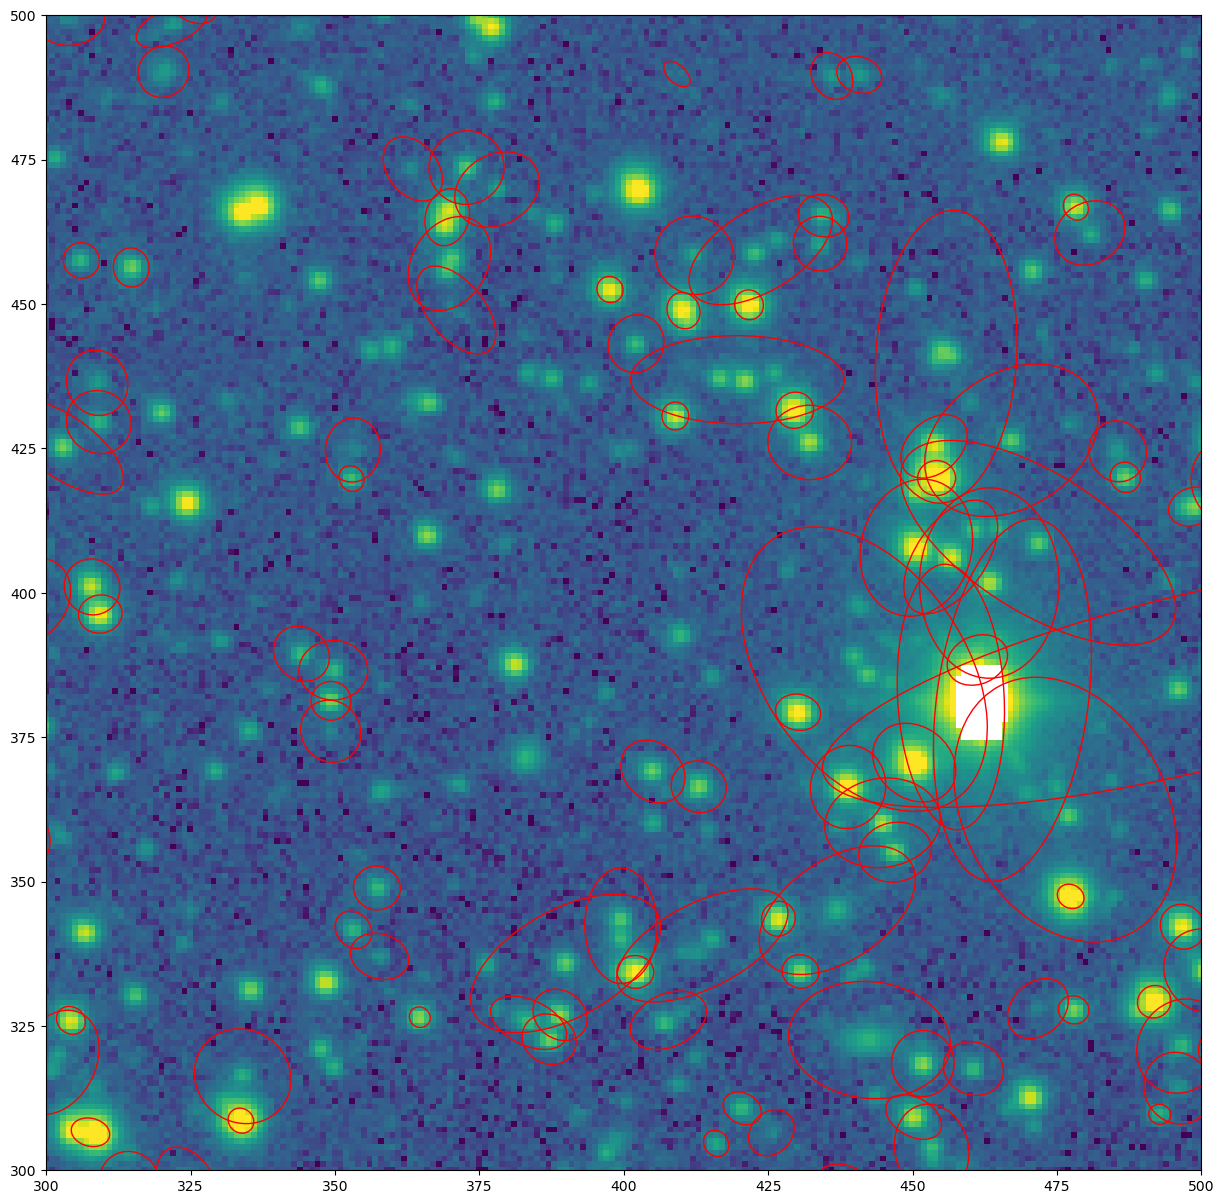

In [6]:
tile.ztf_catalogs['i'].sextractors['i'].plot_segmap(
    show_sources=False,
    show_source_shapes=True,
    source_mask=tile.ztf_catalogs['i'].sextractors['i'].sources['sepExtractionFlag'] == 1,
    image_is_subtracted=True,
)
plt.xlim((300, 500))
plt.ylim((300, 500))
plt.show()

In [ ]:
from Extracting.Tile import Tile
tile = Tile(3.34493560, 30.86753140, bands=['g'], data_dir='/Users/adamboesky/Research/long_transients/Data/ztf_data')

Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=ra>3.261324422+AND+ra<3.428546778+AND+dec>30.783920222+AND+dec<30.951142578000002+AND+filtercode='zg'
Image downloaded and saved at /Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000648_zg_c01_q2_refimg.fits


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Extracting sources...


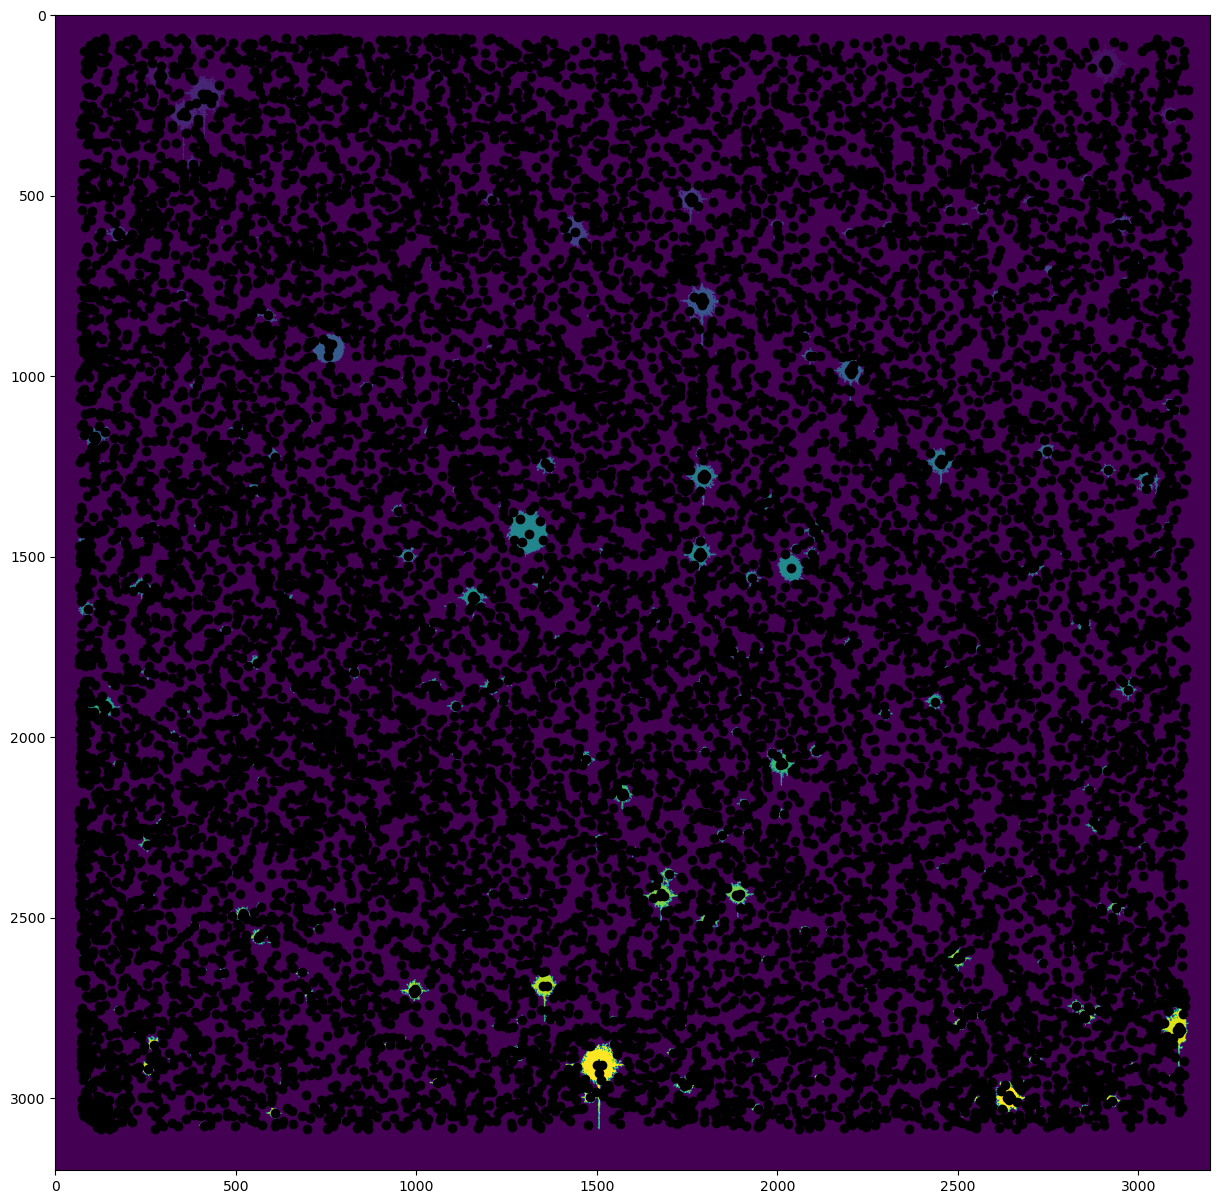

In [7]:
tile.ztf_catalogs['g'].sextractors['g'].plot_segmap()

In [8]:
tile.ztf_catalogs['g'].sextractors['g'].store_coords('/Users/adamboesky/Research/long_transients/Data/blah.txt', coord_system='pixel')